# Inicialización

Entrenar tu red neuronal requiere especificar un valor inicial para los pesos. Un método de inicialización bien elegido ayudará al aprendizaje.  

En este notebook, verás cómo diferentes inicializaciones conducen a diferentes resultados.  

Una inicialización bien elegida puede:  
- Acelerar la convergencia del descenso de gradiente  
- Aumentar las probabilidades de que el descenso de gradiente converja a un error de entrenamiento (y generalización) menor  

Para comenzar, ejecuta la siguiente celda para cargar los paquetes y el conjunto de datos planar que intentarás clasificar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import keras    

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


    

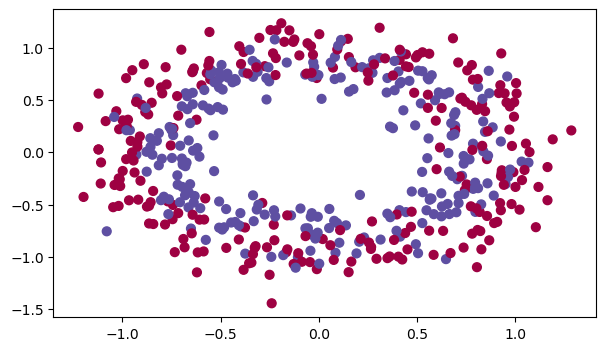

In [2]:
np.random.seed(1)
train_X, train_Y = sklearn.datasets.make_circles(n_samples=500, noise=.15)

test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.15)

# Visualizar
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, s=40, cmap=plt.cm.Spectral);
train_X = train_X

    

In [3]:
print(train_X.shape)
print(train_Y.shape)

(500, 2)
(500,)


Queremos entrenar un clasificador que separe los puntos rojos de los azules

## 1 - Modelo de red

Vamos a usar una red neuronal de 3 capas. Aquí están los métodos de inicialización con los que experimentarás:  

- **Inicialización en ceros** (*Zeros initialization*) 
- **Inicialización aleatoria** (*Random initialization*) Inicializa los pesos con valores aleatorios grandes.  
- **Inicialización de He** (*He initialization*) Inicializa los pesos con valores aleatorios escalados según un artículo de He et al., 2015.  


In [4]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras import Input
from keras.initializers import RandomNormal, GlorotUniform, HeNormal, random_uniform, Zeros
from keras.optimizers import Adam




# Crear el modelo secuencial
model = Sequential([
    Input(shape=(train_X.shape[1],)),
    Dense(10, activation='relu',kernel_initializer=Zeros),  # Capa oculta 1
    Dense(5, activation='relu',kernel_initializer=Zeros),  # Capa oculta 2
    Dense(1, activation='sigmoid')  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Mostrar la estructura del modelo
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
historia=model.fit(train_X, train_Y, epochs=5000, batch_size=500, validation_split=0.2, verbose=0)

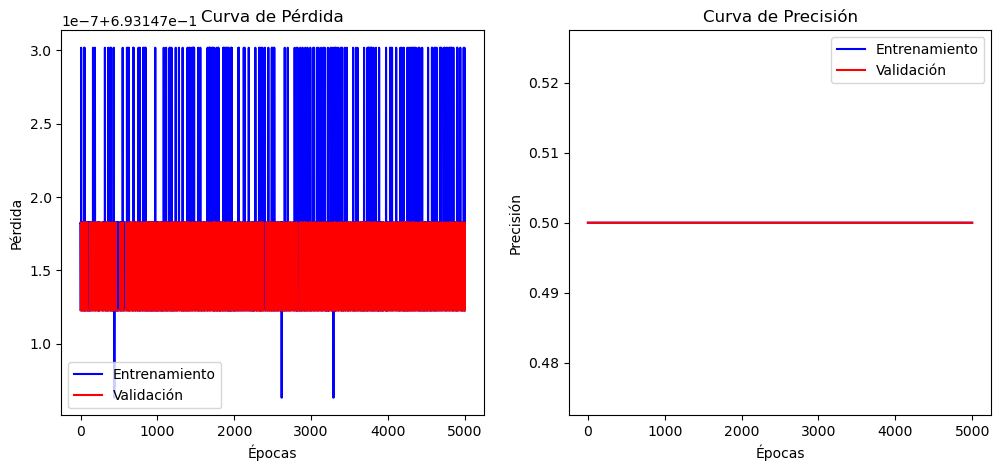

In [7]:
# Extraer la pérdida y precisión del historial
loss = historia.history['loss']
val_loss = historia.history['val_loss']
accuracy = historia.history.get('accuracy')  # Puede ser 'acc' en algunas versiones
val_accuracy = historia.history.get('val_accuracy')  # Puede ser 'val_acc' en algunas versiones

epochs = range(1, len(loss) + 1)  # Número de épocas

# Crear la figura
plt.figure(figsize=(12, 5))

# 🔹 Gráfico de la pérdida (Loss)
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de Pérdida')
plt.legend()

# 🔹 Gráfico de la precisión (Accuracy)
if accuracy and val_accuracy:  # Solo si el modelo tiene accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'b', label='Entrenamiento')
    plt.plot(epochs, val_accuracy, 'r', label='Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.title('Curva de Precisión')
    plt.legend()

# Mostrar los gráficos
plt.show()

6596/6596 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


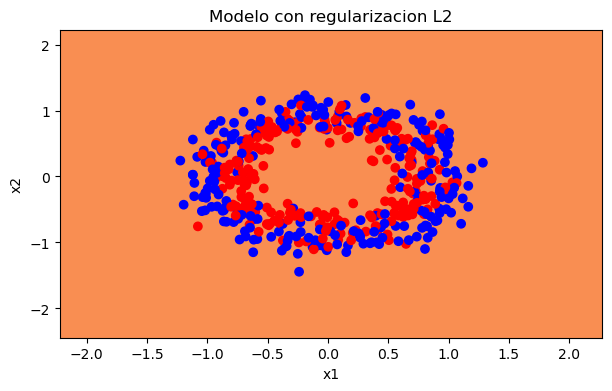

In [8]:
plt.title("Modelo con regularizacion L2")
axes = plt.gca()
#axes.set_xlim([-0.75,0.40])
#axes.set_ylim([-0.75,0.65])
x_min, x_max = train_X[:, 0].min() - 1, train_X[:, 0].max() + 1
y_min, y_max = train_X[:, 1].min() - 1, train_X[:, 1].max() + 1
h = 0.01
# Generamos un grid de puntos con separación h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predicciones para cada punto en el grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)
# Dibujamos el contorno y los puntos originales
plt.contourf(xx, yy, Z,cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, cmap=plt.cm.bwr)
plt.show()



In [9]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras import Input
from keras.initializers import RandomNormal, GlorotUniform, HeNormal, random_uniform, Zeros
from keras.optimizers import Adam




# Crear el modelo secuencial
model = Sequential([
    Input(shape=(train_X.shape[1],)),
    Dense(10, activation='relu',kernel_initializer=random_uniform(minval=-1, maxval=1)),  # Capa oculta 1
    Dense(5, activation='relu',kernel_initializer=random_uniform(minval=-1, maxval=1)),  # Capa oculta 2
    Dense(1, activation='sigmoid')  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Mostrar la estructura del modelo
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
historia=model.fit(train_X, train_Y, epochs=5000, batch_size=500, validation_split=0.2, verbose=0)

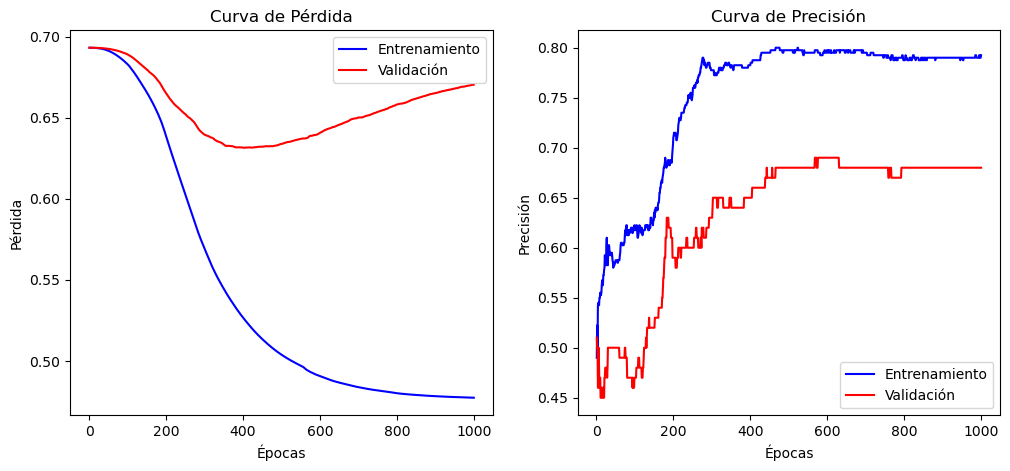

In [16]:
# Extraer la pérdida y precisión del historial
loss = historia.history['loss']
val_loss = historia.history['val_loss']
accuracy = historia.history.get('accuracy')  # Puede ser 'acc' en algunas versiones
val_accuracy = historia.history.get('val_accuracy')  # Puede ser 'val_acc' en algunas versiones

epochs = range(1, len(loss) + 1)  # Número de épocas

# Crear la figura
plt.figure(figsize=(12, 5))

# 🔹 Gráfico de la pérdida (Loss)
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de Pérdida')
plt.legend()

# 🔹 Gráfico de la precisión (Accuracy)
if accuracy and val_accuracy:  # Solo si el modelo tiene accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'b', label='Entrenamiento')
    plt.plot(epochs, val_accuracy, 'r', label='Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.title('Curva de Precisión')
    plt.legend()

# Mostrar los gráficos
plt.show()

   1/6596 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step

6596/6596 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


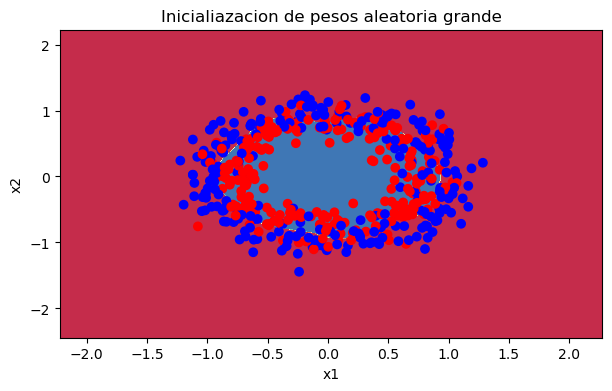

In [13]:
plt.title("Inicialiazacion de pesos aleatoria grande")
axes = plt.gca()
#axes.set_xlim([-0.75,0.40])
#axes.set_ylim([-0.75,0.65])
x_min, x_max = train_X[:, 0].min() - 1, train_X[:, 0].max() + 1
y_min, y_max = train_X[:, 1].min() - 1, train_X[:, 1].max() + 1
h = 0.01
# Generamos un grid de puntos con separación h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predicciones para cada punto en el grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)
# Dibujamos el contorno y los puntos originales
plt.contourf(xx, yy, Z,cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, cmap=plt.cm.bwr)
plt.show()



In [14]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras import Input
from keras.initializers import RandomNormal, GlorotUniform, HeNormal, random_uniform, Zeros
from keras.optimizers import Adam




# Crear el modelo secuencial
model = Sequential([
    Input(shape=(train_X.shape[1],)),
    Dense(10, activation='relu',kernel_initializer=random_uniform(minval=-0.01, maxval=0.01)),  # Capa oculta 1
    Dense(5, activation='relu',kernel_initializer=random_uniform(minval=-0.01, maxval=0.01)),  # Capa oculta 2
    Dense(1, activation='sigmoid')  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Mostrar la estructura del modelo
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
historia=model.fit(train_X, train_Y, epochs=1000, batch_size=500, validation_split=0.2, verbose=0)

6596/6596 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


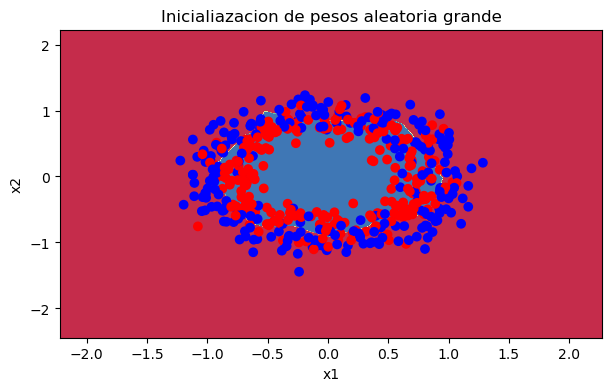

In [14]:
plt.title("Inicialiazacion de pesos aleatoria grande")
axes = plt.gca()
#axes.set_xlim([-0.75,0.40])
#axes.set_ylim([-0.75,0.65])
x_min, x_max = train_X[:, 0].min() - 1, train_X[:, 0].max() + 1
y_min, y_max = train_X[:, 1].min() - 1, train_X[:, 1].max() + 1
h = 0.01
# Generamos un grid de puntos con separación h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predicciones para cada punto en el grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)
# Dibujamos el contorno y los puntos originales
plt.contourf(xx, yy, Z,cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y, cmap=plt.cm.bwr)
plt.show()



In [17]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras import Input
from keras.initializers import RandomNormal, GlorotUniform, HeNormal, random_uniform, Zeros
from keras.optimizers import Adam




# Crear el modelo secuencial
model = Sequential([
    Input(shape=(train_X.shape[1],)),
    Dense(10, activation='relu',kernel_initializer=HeNormal),  # Capa oculta 1
    Dense(5, activation='relu',kernel_initializer=HeNormal),  # Capa oculta 2
    Dense(1, activation='sigmoid')  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Mostrar la estructura del modelo
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
historia=model.fit(train_X, train_Y, epochs=1000, batch_size=500, validation_split=0.2, verbose=0)

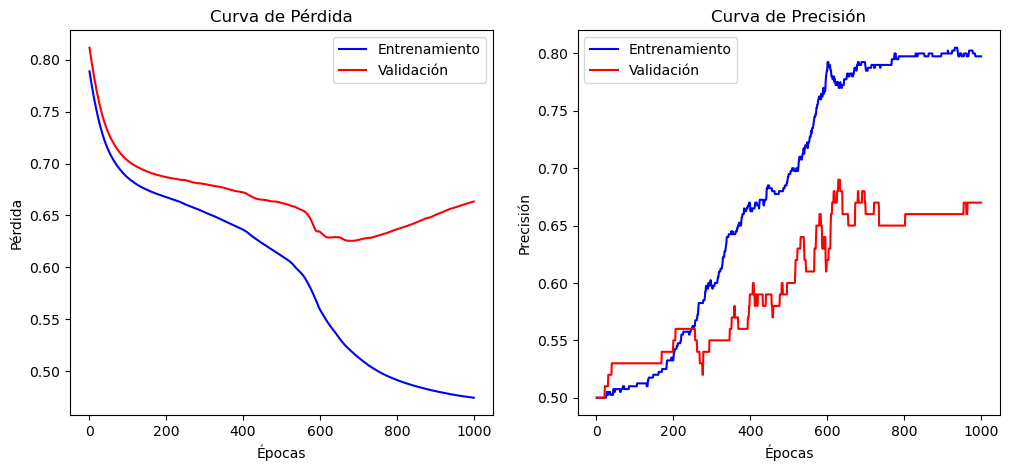

In [19]:
# Extraer la pérdida y precisión del historial
loss = historia.history['loss']
val_loss = historia.history['val_loss']
accuracy = historia.history.get('accuracy')  # Puede ser 'acc' en algunas versiones
val_accuracy = historia.history.get('val_accuracy')  # Puede ser 'val_acc' en algunas versiones

epochs = range(1, len(loss) + 1)  # Número de épocas

# Crear la figura
plt.figure(figsize=(12, 5))

# 🔹 Gráfico de la pérdida (Loss)
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de Pérdida')
plt.legend()

# 🔹 Gráfico de la precisión (Accuracy)
if accuracy and val_accuracy:  # Solo si el modelo tiene accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'b', label='Entrenamiento')
    plt.plot(epochs, val_accuracy, 'r', label='Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.title('Curva de Precisión')
    plt.legend()

# Mostrar los gráficos
plt.show()